In [812]:
# Import universal packages:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import time
from matplotlib import animation
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
import time
import matplotlib.animation as animation
from scipy.optimize import curve_fit

# The model

In [1012]:
%run GameOfCloud.py

# Run multiple days of DIU and plot

In [1022]:
ndays = 21

x, Tns, counter,trop_temp_saved = gameofcloud(ndays, DIU=True, persistence='yes', branching=False, Tns_branch=False)


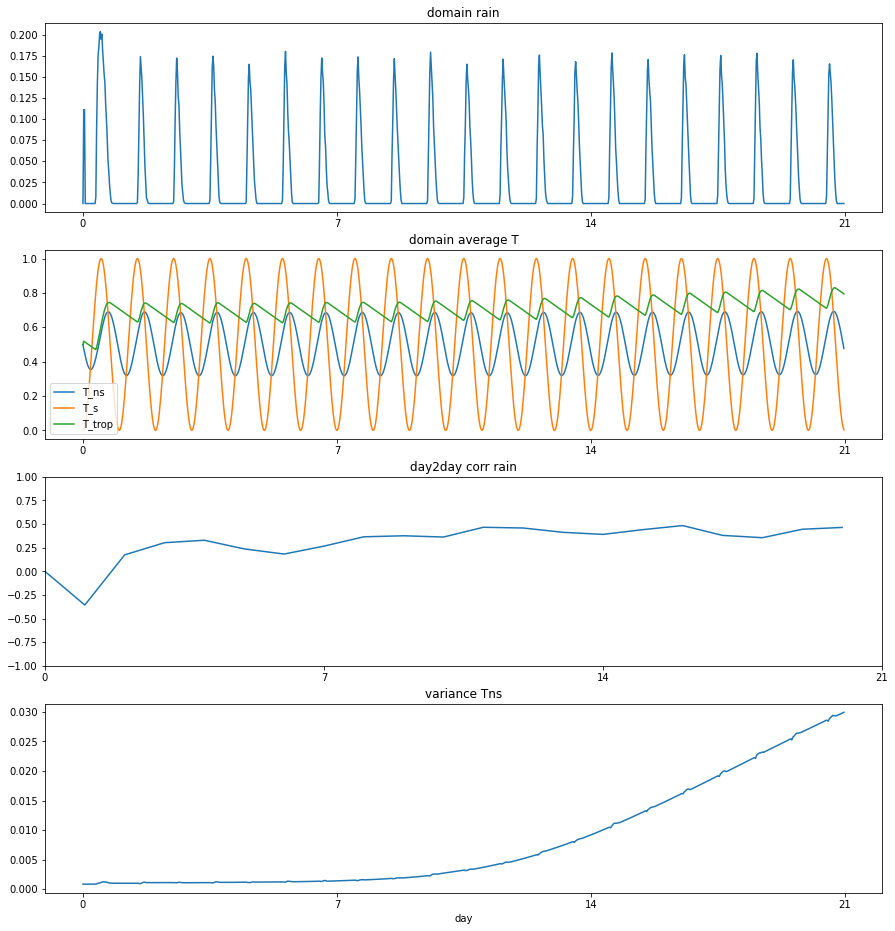

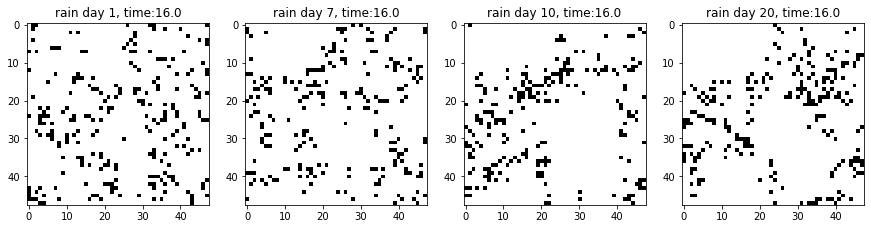

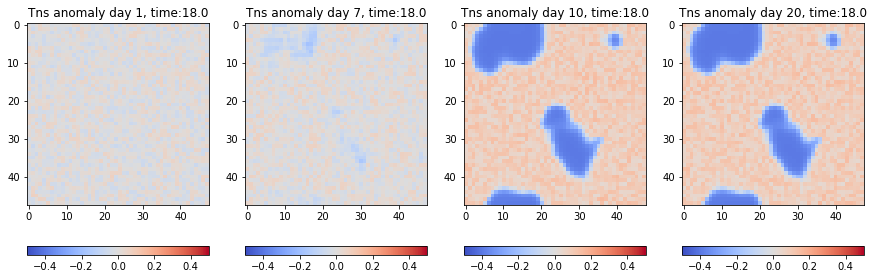

avg activity 0.025644669036596117


In [1025]:
%matplotlib inline
nsteps_day = 48



cps = Tns[:] - np.mean(Tns,axis=(1,2))[:,None,None]

fig = plt.figure(figsize=(15,16))
ax1 = plt.subplot(411)

ax1.set_title('domain rain')
ax1.plot(np.arange(0,np.size(np.mean(x, axis=(1,2)))), np.mean(x, axis=(1,2)))
xaxis=np.arange(0,len(x)+1,nsteps_day)
ax1.set_xticks(np.arange(0,(ndays+1)*nsteps_day,7*nsteps_day))
ax1.set_xticklabels(np.arange(0,ndays+1,7))
               
ax2 = plt.subplot(412)
ax2.set_title('domain average T')
ax2.plot(np.arange(0,np.size(np.mean(Tns, axis=(1,2)))), np.mean(Tns, axis=(1,2)), label='T_ns')
ax2.plot(np.arange(0,np.size(np.mean(Tns, axis=(1,2)))), Ts(np.arange(0,np.size(np.mean(Tns, axis=(1,2)))),nsteps_day,True), label='T_s')
ax2.plot(trop_temp_saved, label='T_trop')
ax2.legend()
ax2.set_xticks(np.arange(0,(ndays+1)*nsteps_day,7*nsteps_day))
ax2.set_xticklabels(np.arange(0,ndays+1,7))



ax3 = plt.subplot(413)
ax3.set_title('day2day corr rain')
ax3.plot(np.arange(0,ndays),calc_corr(x, ndays, N_steps_day = nsteps_day))
ax3.set_ylim(-1,1)
ax3.set_xlim(0,ndays)
ax3.set_xticks(np.arange(0,ndays+1,7))
ax3.set_xticklabels(np.arange(0,ndays+1,7))

ax4 = plt.subplot(414)
ax4.set_title('variance Tns')
ax4.plot(np.var(Tns,axis=(1,2)))
ax4.set_xticks(np.arange(0,(ndays+1)*nsteps_day,7*nsteps_day))
ax4.set_xticklabels(np.arange(0,ndays+1,7))
ax4.set_xlabel('day')


plt.show()


fig = plt.figure(figsize=(15,5))

d4 = 1
d3 = int(ndays/3)
d2 = int(ndays/2)
d1 = ndays-1

plotstep = 32
day_minus4=(x[nsteps_day*d4 + plotstep])
day_minus3=(x[nsteps_day*d3 + plotstep])
day_minus2=(x[nsteps_day*d2 + plotstep])
day_last  =(x[nsteps_day*d1 + plotstep])
ax1 = plt.subplot(141)
ax1.imshow(day_minus4, cmap='Greys',vmin=0, vmax=0.1)
ax1.set_title('rain day ' + str(d4) + ', time:' + str(24*plotstep/48))
ax2 = plt.subplot(142)
ax2.imshow(day_minus3, cmap='Greys',vmin=0, vmax=0.1)
ax2.set_title('rain day ' + str(d3)+ ', time:' + str(24*plotstep/48))
ax3 = plt.subplot(143)
ax3.imshow(day_minus2, cmap='Greys',vmin=0, vmax=0.1)
ax3.set_title('rain day ' + str(d2)+ ', time:' + str(24*plotstep/48))
ax4 = plt.subplot(144)
ax4.imshow(day_last, cmap='Greys',vmin=0, vmax=0.1)
ax4.set_title('rain day ' + str(d1)+ ', time:' + str(24*plotstep/48))

plotstep = 36
fig = plt.figure(figsize=(15,5))
vmin=-0.5
vmax=0.5
day_minus4=(cps[nsteps_day*d4 + plotstep,:,:])
day_minus3=(cps[nsteps_day*d3 + plotstep,:,:])
day_minus2=(cps[nsteps_day*d1 -1 + plotstep,:,:])
day_last  =(cps[nsteps_day*d1 + plotstep,:,:])
ax1 = plt.subplot(141)
im1 = ax1.imshow(day_minus4, cmap='coolwarm',vmin=vmin, vmax=vmax)
ax1.set_title('Tns anomaly day ' + str(d4) + ', time:' + str(24*plotstep/48))
ax2 = plt.subplot(142)
im2 = ax2.imshow(day_minus3, cmap='coolwarm',vmin=vmin, vmax=vmax)
ax2.set_title('Tns anomaly day ' + str(d3) + ', time:' + str(24*plotstep/48))
ax3 = plt.subplot(143)
im3 = ax3.imshow(day_minus2, cmap='coolwarm',vmin=vmin, vmax=vmax)
ax3.set_title('Tns anomaly day ' + str(d2) + ', time:' + str(24*plotstep/48))
ax4 = plt.subplot(144)
im4 = ax4.imshow(day_last, cmap='coolwarm',vmin=vmin, vmax=vmax)
ax4.set_title('Tns anomaly day ' + str(d1)+ ', time:' + str(24*plotstep/48))

fig.colorbar(im1, ax=ax1, orientation='horizontal')
fig.colorbar(im2, ax=ax2, orientation='horizontal')
fig.colorbar(im3, ax=ax3, orientation='horizontal')
fig.colorbar(im4, ax=ax4, orientation='horizontal')

plt.show()

print('avg activity', np.mean(np.mean(x, axis=(1,2))))


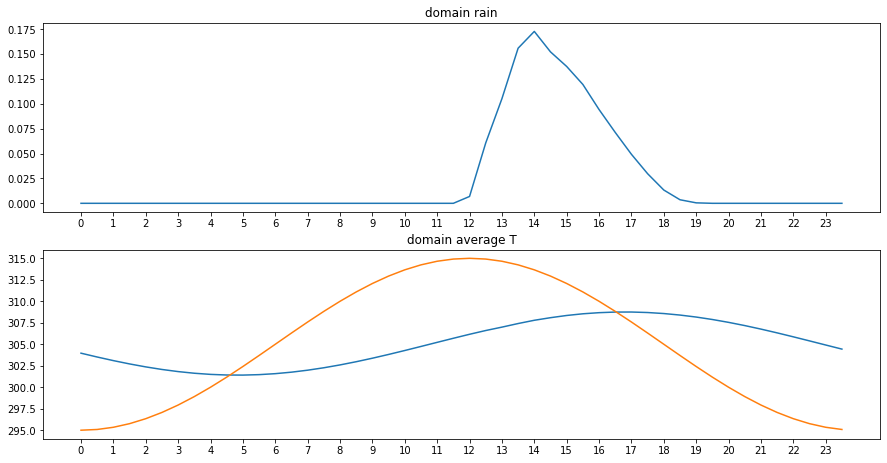

In [1026]:
%matplotlib inline

cps = Tns[:] - np.mean(Tns,axis=(1,2))[:,None,None]

fig = plt.figure(figsize=(15,16))
ax1 = plt.subplot(411)

ax1.set_title('domain rain')
rain_timeseries=np.mean(x, axis=(1,2))
ax1.plot(np.mean(rain_timeseries[7*48:].reshape(-1, 48), axis=0))
ax1.set_xticks(np.arange(0,48,2))
ax1.set_xticklabels(np.arange(0,24,1))
               
ax2 = plt.subplot(412)
ax2.set_title('domain average T')
#np.mean(arr.reshape(-1, 3), axis=1)
Tns_timeseries=295+20*np.mean(Tns[7*48:], axis=(1,2))
#295+20*Ts(np.arange(0,np.size(np.mean(Tns, axis=(1,2)))),nsteps_day,True)
ax2.plot( np.mean(Tns_timeseries.reshape(-1, 48), axis=0), label='T_ns')
ax2.plot( 295+20*Ts(np.arange(0,48),48,True))
ax2.set_xticks(np.arange(0,48,2))
ax2.set_xticklabels(np.arange(0,24,1))
plt.show()

[Text(0, 0, '0'), Text(336, 0, '7'), Text(672, 0, '14'), Text(1008, 0, '21')]

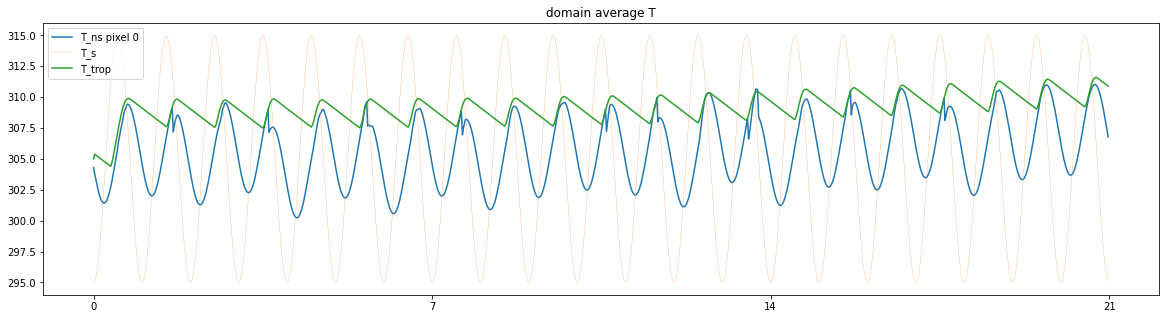

In [1027]:
plt.figure(figsize=(20,5))
ax2 = plt.subplot(111)
ax2.set_title('domain average T')
ax2.plot(np.arange(0,np.size(np.mean(Tns, axis=(1,2)))), 295+20*(Tns[:,0,0]), label='T_ns pixel 0')
ax2.plot(np.arange(0,np.size(np.mean(Tns, axis=(1,2)))), 295+20*Ts(np.arange(0,np.size(np.mean(Tns, axis=(1,2)))),nsteps_day,True), label='T_s', linewidth=0.2)
ax2.plot(295+20*trop_temp_saved, label='T_trop')
ax2.legend()
ax2.set_xticks(np.arange(0,(ndays+1)*nsteps_day,7*nsteps_day))
ax2.set_xticklabels(np.arange(0,ndays+1,7))

# Run OCEAN and plot


In [1028]:
%matplotlib inline
ndays_ocean = 20

x_ocean, Tns_ocean, counter_ocean, trop_temp_saved_ocean = gameofcloud(ndays_ocean, DIU=False,persistence='yes', branching=False, Tns_branch=False) 

# set branching=True and Tns_branch=Tns[-1] to branch from last step of DIU

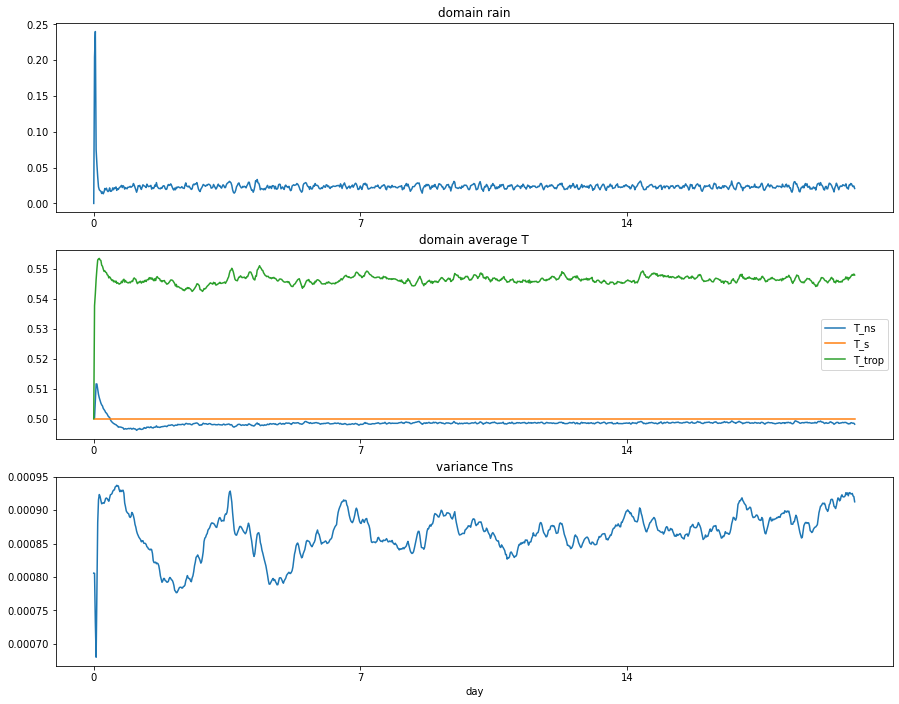

avg activity 0.02378969545717592


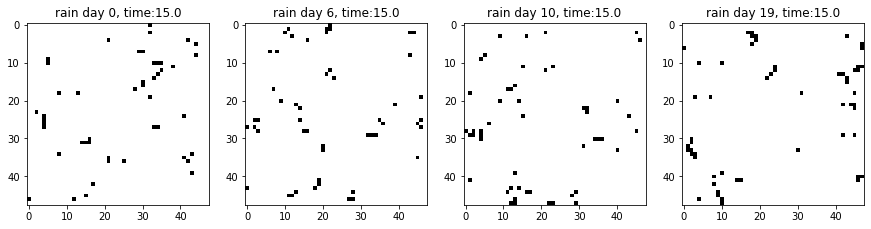

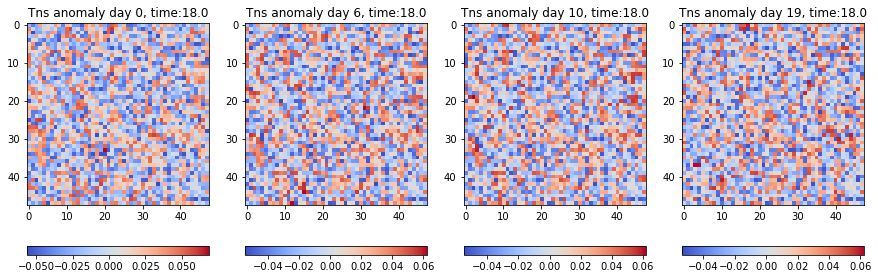

In [1029]:
%matplotlib inline

nsteps_day=48

fig = plt.figure(figsize=(15,16))
ax1 = plt.subplot(411)

ax1.set_title('domain rain')
ax1.plot(np.arange(0,np.size(np.mean(x_ocean, axis=(1,2)))), np.mean(x_ocean, axis=(1,2)))
xaxis=np.arange(0,len(x_ocean)+1,nsteps_day)
ax1.set_xticks(np.arange(0,(ndays_ocean+1)*nsteps_day,7*nsteps_day))
ax1.set_xticklabels(np.arange(0,ndays_ocean+1,7))

ax2 = plt.subplot(412)
ax2.set_title('domain average T')
ax2.plot(np.arange(0,np.size(np.mean(Tns_ocean, axis=(1,2)))), np.mean(Tns_ocean, axis=(1,2)), label='T_ns')
ax2.plot(np.arange(0,np.size(np.mean(Tns_ocean, axis=(1,2)))), Ts(0,nsteps_day, False)*np.ones(np.size(np.mean(Tns_ocean, axis=(1,2)))), label='T_s')
ax2.plot(trop_temp_saved_ocean, label='T_trop')
ax2.legend()
ax2.set_xticks(np.arange(0,(ndays_ocean+1)*nsteps_day,7*nsteps_day))
ax2.set_xticklabels(np.arange(0,ndays_ocean+1,7))


ax4 = plt.subplot(413)
ax4.set_title('variance Tns')
ax4.plot(np.var(Tns_ocean,axis=(1,2)))
ax4.set_xticks(np.arange(0,(ndays_ocean+1)*nsteps_day,7*nsteps_day))
ax4.set_xticklabels(np.arange(0,ndays_ocean+1,7))
ax4.set_xlabel('day')



plt.show()

d4 = 0
d3 = int(ndays_ocean/3)
d2 = int(ndays_ocean/2)
d1 = ndays_ocean-1


fig = plt.figure(figsize=(15,5))

plotstep = 30
day_minus4=(x_ocean[d4 + plotstep])
day_minus3=(x_ocean[d3 + plotstep])
day_minus2=(x_ocean[d2 + plotstep])
day_last  =(x_ocean[d1 + plotstep])
ax1 = plt.subplot(141)
ax1.imshow(day_minus4, cmap='Greys',vmin=0, vmax=0.1)
ax1.set_title('rain day ' + str(d4)+ ', time:' + str(24*plotstep/48))
ax2 = plt.subplot(142)
ax2.imshow(day_minus3, cmap='Greys',vmin=0, vmax=0.1)
ax2.set_title('rain day ' + str(d3)+ ', time:' + str(24*plotstep/48))
ax3 = plt.subplot(143)
ax3.imshow(day_minus2, cmap='Greys',vmin=0, vmax=0.1)
ax3.set_title('rain day ' + str(d2)+ ', time:' + str(24*plotstep/48))
ax4 = plt.subplot(144)
ax4.imshow(day_last, cmap='Greys',vmin=0, vmax=0.1)
ax4.set_title('rain day ' + str(d1)+ ', time:' + str(24*plotstep/48))

fig = plt.figure(figsize=(15,5))
plotstep= 36

cps_ocean = Tns_ocean[:] - np.mean(Tns_ocean,axis=(1,2))[:,None,None]


day_minus4=(cps_ocean[d4 + plotstep,:,:])
day_minus3=(cps_ocean[d3 + plotstep,:,:])
day_minus2=(cps_ocean[d2 + plotstep,:,:])
day_last  =(cps_ocean[d1 + plotstep,:,:])


ax1 = plt.subplot(141)
im1 = ax1.imshow(day_minus4, cmap='coolwarm') #, vmax=1)
ax1.set_title('Tns anomaly day ' + str(d4) + ', time:' + str(24*plotstep/48))
ax2 = plt.subplot(142)
im2 = ax2.imshow(day_minus3, cmap='coolwarm') #,vmin=299.9, vmax=300.1)
ax2.set_title('Tns anomaly day ' + str(d3) + ', time:' + str(24*plotstep/48))
ax3 = plt.subplot(143)
im3 = ax3.imshow(day_minus2, cmap='coolwarm') #,vmin=299.9, vmax=300.1)
ax3.set_title('Tns anomaly day ' + str(d2) + ', time:' + str(24*plotstep/48))
ax4 = plt.subplot(144)
im4 = ax4.imshow(day_last, cmap='coolwarm') #,vmin=299.9, vmax=300.1)
ax4.set_title('Tns anomaly day ' + str(d1) + ', time:' + str(24*plotstep/48))

fig.colorbar(im1, ax=ax1, orientation='horizontal')
fig.colorbar(im2, ax=ax2, orientation='horizontal')
fig.colorbar(im3, ax=ax3, orientation='horizontal')
fig.colorbar(im4, ax=ax4, orientation='horizontal')

print('avg activity', np.mean(np.mean(x_ocean, axis=(1,2))))

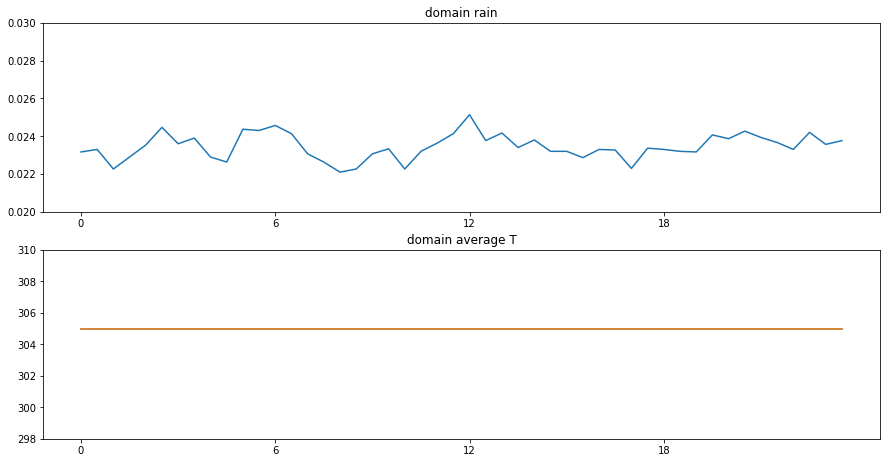

In [998]:
%matplotlib inline

cps = Tns_ocean[:] - np.mean(Tns_ocean,axis=(1,2))[:,None,None]

fig = plt.figure(figsize=(15,16))
ax1 = plt.subplot(411)

ax1.set_title('domain rain')
rain_timeseries=np.mean(x_ocean, axis=(1,2))
ax1.plot(np.mean(rain_timeseries[7*48:].reshape(-1, 48), axis=0))
ax1.set_xticks(np.arange(0,48,12))
ax1.set_xticklabels(np.arange(0,24,6))
ax1.set_ylim(0.02,0.03)
               
ax2 = plt.subplot(412)
ax2.set_title('domain average T')
#np.mean(arr.reshape(-1, 3), axis=1)
Tns_timeseries=295+20*np.mean(Tns_ocean, axis=(1,2))
#295+20*Ts(np.arange(0,np.size(np.mean(Tns, axis=(1,2)))),nsteps_day,True)
ax2.plot(np.ones(48)*(295+20*Ts(np.arange(0,48),48,False)))
ax2.plot( np.mean(Tns_timeseries[7*48:].reshape(-1, 48), axis=0), label='T_ns')

ax2.set_ylim(298,310)
ax2.set_xticks(np.arange(0,48,12))
ax2.set_xticklabels(np.arange(0,24,6))
plt.show()

# Run ensemble of DIU + OCEAN + OCEAN branches, and plot

In [1031]:
# NOTE: takes a while to run
ensemble_runs = 10
days1 = 28
days2 = 42
ndays              = days1 + days2
ndays_ocean        = days1 + days2
ndays_oceanBRANCH  = days2
daybranch1         = 5
daybranch2          = 28

corr_DIU_ALL=np.zeros((ensemble_runs,ndays))
corr_OCEAN_ALL=np.zeros((ensemble_runs,ndays_ocean))
corr_OCEANBRANCH1_ALL=np.zeros((ensemble_runs,ndays_oceanBRANCH))
corr_OCEANBRANCH2_ALL=np.zeros((ensemble_runs,ndays_oceanBRANCH))

var_DIU_ALL=np.zeros((ensemble_runs,ndays*nsteps_day))
var_OCEAN_ALL=np.zeros((ensemble_runs,ndays_ocean*nsteps_day))
var_OCEANBRANCH1_ALL=np.zeros((ensemble_runs,ndays_oceanBRANCH*nsteps_day))
var_OCEANBRANCH2_ALL=np.zeros((ensemble_runs,ndays_oceanBRANCH*nsteps_day))


for run in range(0,ensemble_runs):
    
    
    x, Tns, counter,trop_temp_saved = gameofcloud(
        ndays, DIU=True, persistence='yes', branching=False, Tns_branch=False)
    
    corr_DIU_ALL[run] = calc_corr(x, ndays, N_steps_day=nsteps_day)
    var_DIU_ALL[run] = np.var(Tns,axis=(1,2))/np.mean(Tns,axis=(1,2))
    
    x_oceanBRANCH1, Tns_oceanBRANCH1, counter_oceanBRANCH1, trop_temp_saved_oceanBRANCH1 = gameofcloud(
        ndays_oceanBRANCH, DIU=False, persistence='yes', branching=True, Tns_branch=Tns[daybranch1*nsteps_day])

    
    corr_OCEANBRANCH1_ALL[run] = calc_corr(x_oceanBRANCH1, ndays_oceanBRANCH, N_steps_day=nsteps_day)
    var_OCEANBRANCH1_ALL[run] = np.var(Tns_oceanBRANCH1,axis=(1,2))/np.mean(Tns_oceanBRANCH1,axis=(1,2))
   
    
    
    x_oceanBRANCH2, Tns_oceanBRANCH2, counter_oceanBRANCH2, trop_temp_saved_oceanBRANCH2 = gameofcloud(
        ndays_oceanBRANCH, DIU=False, persistence='yes', branching=True, Tns_branch=Tns[daybranch2*nsteps_day])

    
    corr_OCEANBRANCH2_ALL[run] = calc_corr(x_oceanBRANCH2, ndays_oceanBRANCH, N_steps_day=nsteps_day)
    var_OCEANBRANCH2_ALL[run] = np.var(Tns_oceanBRANCH2,axis=(1,2))/np.mean(Tns_oceanBRANCH2,axis=(1,2))
    
    x_ocean, Tns_ocean, counter_ocean, trop_temp_saved_ocean = gameofcloud(
        ndays_ocean, DIU=False, persistence='yes', branching=False, Tns_branch=False)
    
    corr_OCEAN_ALL[run] = calc_corr(x_ocean, ndays_ocean, N_steps_day=nsteps_day)
    var_OCEAN_ALL[run] = np.var(Tns_ocean,axis=(1,2))/np.mean(Tns_ocean,axis=(1,2))
    
print('finished')

KeyboardInterrupt: 

In [50]:
def plot_branches_all_spread(diu, diu_std, ocean, ocean_std, branch1, branch1_std, branch2, branch2_std, name, spread='no',log='no', daybranch1=daybranch1, daybranch2=daybranch2):
    var = diu
    std = diu_std
    var_ocean = ocean
    std_ocean = ocean_std
    daybranch1= daybranch1
    daybranch2= daybranch2
    var_ocA1 = branch1
    std_ocA1 = branch1_std
    var_ocA2 = branch2
    std_ocA2 = branch2_std
    ylabel = str(name)
    
    fig, ax= plt.subplots(figsize=(10,3), dpi=200)
    var_ocA2[0]=var[daybranch2]
    p1, = plt.plot(np.linspace(0,days1+days2,len(var)),var,color='forestgreen', label='DIU',linewidth=1, alpha=1)
    p0, = plt.plot(np.linspace(0,days1+days2,len(var_ocean)),var_ocean, color='navy', linewidth=1, alpha=0.3, label='OCEAN')
    #p2, = plt.plot(np.linspace(daybranch1,daybranch1+days2,len(var_ocA1)-1),var_ocA1[1:],color='dodgerblue', label='OCEAN branch 1',linewidth=0.5)
    p3, = plt.plot(np.linspace(daybranch2,daybranch2+days2,len(var_ocA2)-1),var_ocA2[1:],color='dodgerblue', label='OCEAN branch 2',linewidth=0.5)
    
    l1 = plt.legend([p1,p0], ['DIU','OCEAN'], loc=2)
    l2 = plt.legend([p3], ['DIU2OCEAN branches'], loc=4)
    if spread=='yes':
        p1 = plt.fill_between(np.linspace(0,days1+days2,len(var)), (var-std), (var+std), color='forestgreen', alpha=.1)
        p0 = plt.fill_between(np.linspace(0,days1+days2,len(var_ocean)), (var_ocean-std_ocean), (var_ocean+std_ocean), color='navy', alpha=.1)
     #   p2 = plt.fill_between(np.linspace(daybranch1,daybranch1+days2,len(var_ocA1)-1), (var_ocA1-std_ocA1)[1:], (var_ocA1+std_ocA1)[1:], color='dodgerblue', alpha=.1)
        p3 = plt.fill_between(np.linspace(daybranch2,daybranch2+days2,len(var_ocA2)-1), (var_ocA2-std_ocA2)[1:], (var_ocA2+std_ocA2)[1:], color='dodgerblue', alpha=.1)
        
    plt.title('')
    plt.xlabel('time [day of sim]')
    plt.ylabel(ylabel)
    if log=='yes':
        plt.yticks(np.linspace(-4,0,3))
        plt.ylim((1e-4,1e0))
        plt.yscale('log') 
    plt.xticks(np.arange(0,70,14))
    plt.xlim(0,70)

    plt.grid()
    plt.gca().add_artist(l1) 
    plt.show()
    return

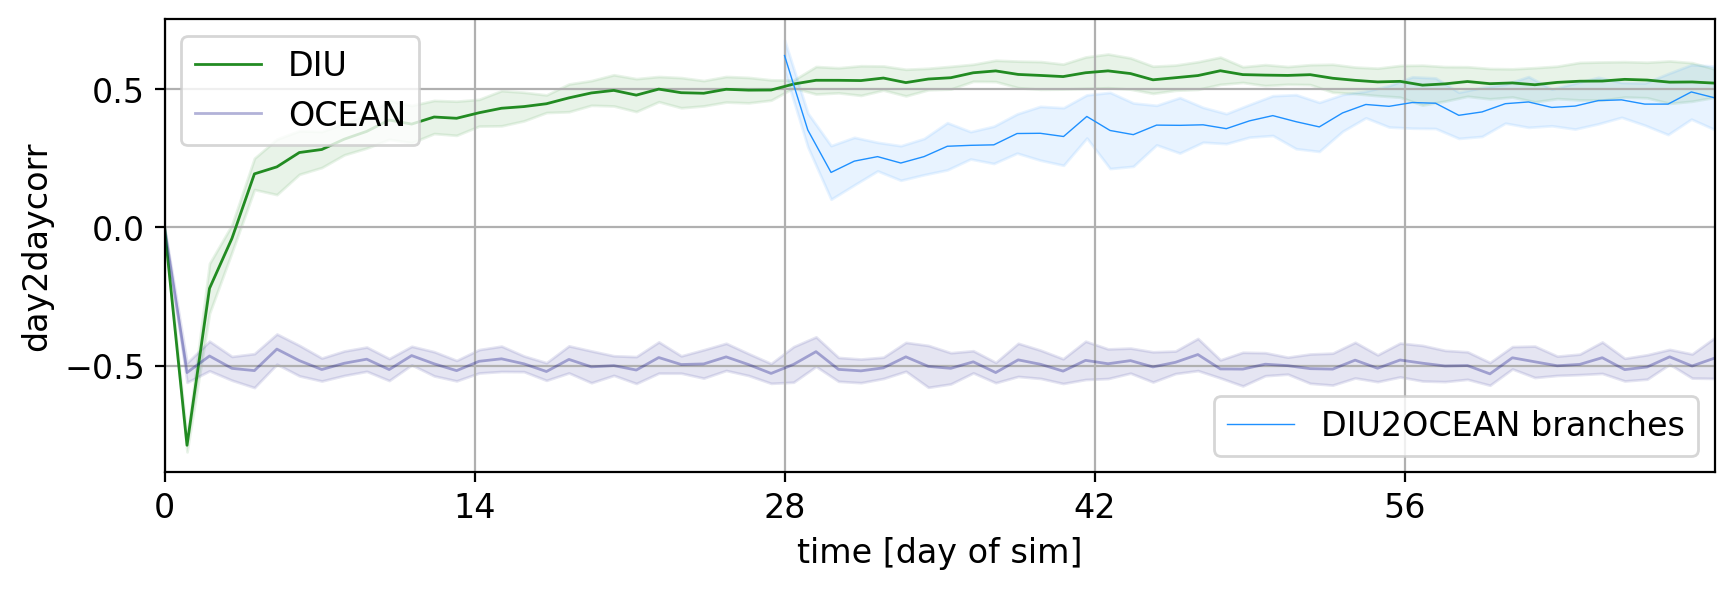

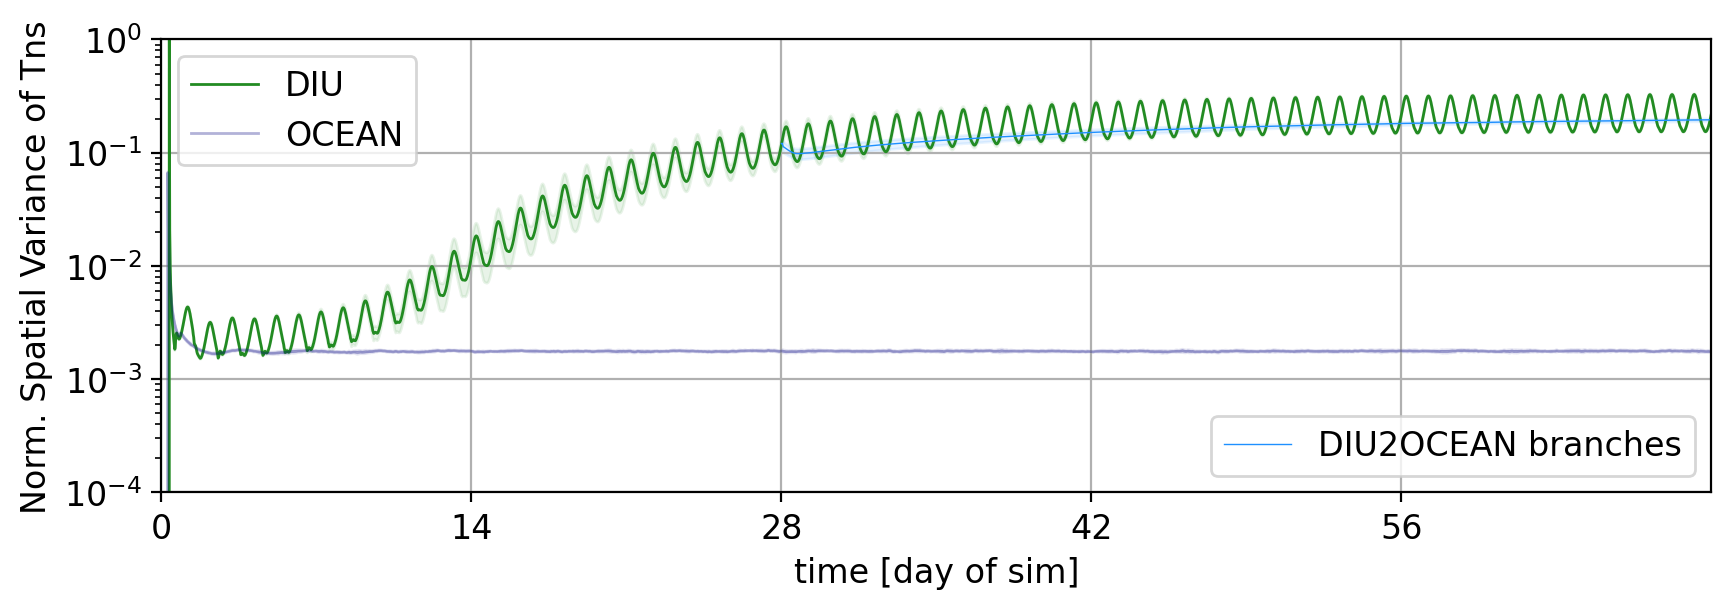

In [51]:
daybranch1=5
daybranch2=28
plt.rcParams.update({'font.size': 12})
diu = np.nanmean(corr_DIU_ALL, axis=0)
diu_std = np.nanstd(corr_DIU_ALL, axis=0)
ocean = np.nanmean(corr_OCEAN_ALL, axis=0)
ocean_std = np.nanstd(corr_OCEAN_ALL, axis=0)
branch1 = np.nanmean(corr_OCEANBRANCH1_ALL,axis=0)
branch1_std = np.nanstd(corr_OCEANBRANCH1_ALL,axis=0)
branch2 = np.nanmean(corr_OCEANBRANCH2_ALL,axis=0)
branch2_std = np.nanstd(corr_OCEANBRANCH2_ALL,axis=0)


diu_var = np.nanmean(var_DIU_ALL, axis=0)
diu_var_std = np.nanstd(var_DIU_ALL, axis=0)
ocean_var = np.nanmean(var_OCEAN_ALL, axis=0)
ocean_var_std = np.nanstd(var_OCEAN_ALL, axis=0)
branch1_var = np.nanmean(var_OCEANBRANCH1_ALL,axis=0)
branch1_var_std = np.nanstd(var_OCEANBRANCH1_ALL,axis=0)
branch2_var = np.nanmean(var_OCEANBRANCH2_ALL,axis=0)
branch2_var_std = np.nanstd(var_OCEANBRANCH2_ALL,axis=0)



plot_branches_all_spread(diu, diu_std, ocean, ocean_std, branch1, branch1_std, branch2, branch2_std, 
                         'day2daycorr', spread='yes',daybranch1=daybranch1, daybranch2=daybranch2)

plot_branches_all_spread(diu_var[::], diu_var_std[::], ocean_var[::], ocean_var_std[::], branch1_var[::], branch1_var_std[::], branch2_var[::], branch2_var_std[::], 
                         'Norm. Spatial Variance of Tns', spread='yes', daybranch1=daybranch1, daybranch2=daybranch2, log='yes')



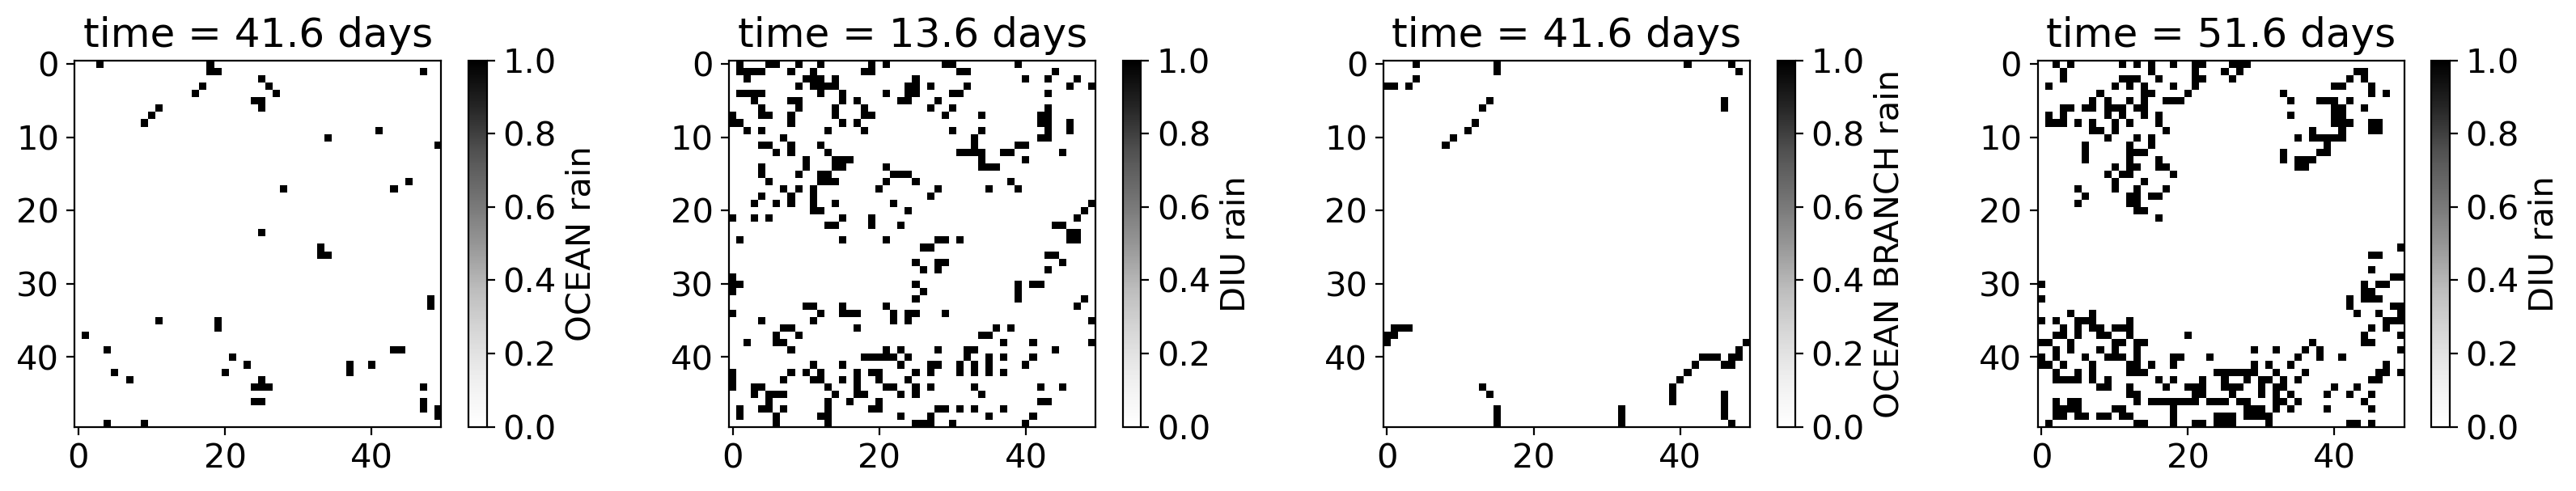

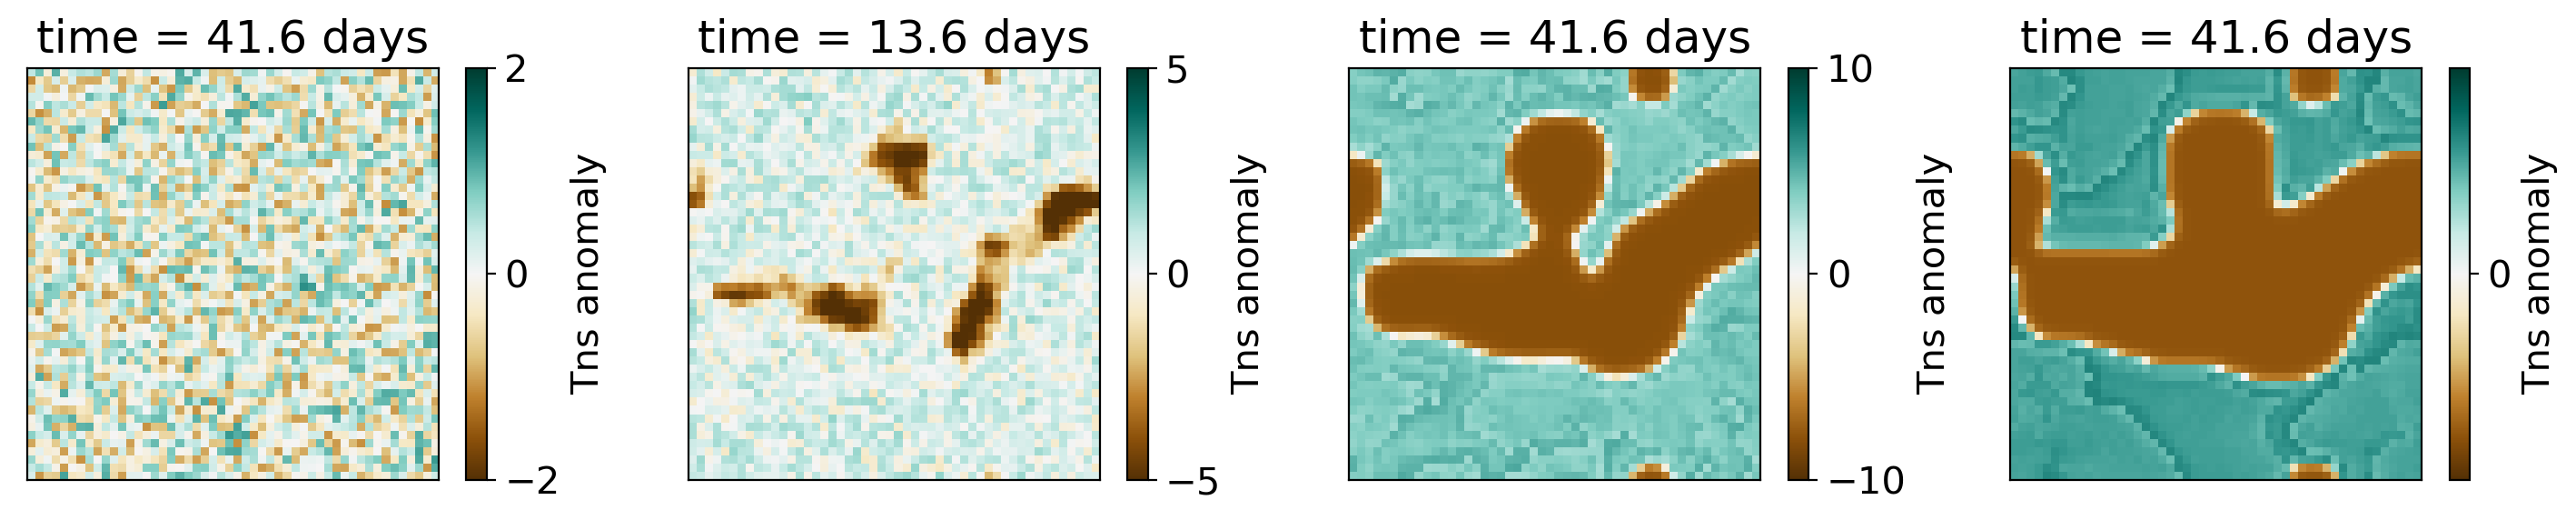

In [156]:
fig = plt.figure(figsize=(20,3), dpi=200)
vmin=0.5
vmax=0.55
plt.rcParams.update({'font.size': 15})

ax1 = plt.subplot(141)
ax1.set_title('time = 41.6 days')
ax2 = plt.subplot(142)
ax2.set_title('time = 13.6 days')
ax3 = plt.subplot(143)
ax3.set_title('time = 41.6 days')
ax4 = plt.subplot(144)
ax4.set_title('time = 51.6 days')
im1 = ax1.imshow(x_ocean[41*48+30], cmap='Greys') 
im2 = ax2.imshow(x[13*48+30], cmap='Greys')
im3 = ax3.imshow(x_oceanBRANCH2[41*48+30],cmap='Greys') 
im4 = ax4.imshow(x[41*48+30], cmap='Greys')
fig.colorbar(im1, ax=ax1, orientation='vertical', label='OCEAN rain')
fig.colorbar(im2, ax=ax2, orientation='vertical', label='DIU rain')
fig.colorbar(im3, ax=ax3, orientation='vertical', label='OCEAN BRANCH rain')
fig.colorbar(im4, ax=ax4, orientation='vertical', label='DIU rain')
plt.show()


cps = Tns[:] - np.mean(Tns,axis=(1,2))[:,None,None]
cps_ocean = Tns_ocean[:] - np.mean(Tns_ocean,axis=(1,2))[:,None,None]
cps_oceanBRANCH2 = Tns_oceanBRANCH2[:] - np.mean(Tns_oceanBRANCH2,axis=(1,2))[:,None,None]

fig = plt.figure(figsize=(18,3), dpi=200)
vmin=0.5
vmax=0.55

ax1 = plt.subplot(141)
ax1.set_title('time = 41.6 days')
ax2 = plt.subplot(142)
ax2.set_title('time = 13.6 days')
ax3 = plt.subplot(143)
ax3.set_title('time = 41.6 days')
ax4 = plt.subplot(144)
ax4.set_title('time = 41.6 days')


im1 = ax1.imshow(20*cps_ocean[41*48+30], cmap='BrBG', vmin=-2, vmax=2)
im2 = ax2.imshow(20*cps[13*48+30], cmap='BrBG',vmin=-5, vmax=5)
im3 = ax3.imshow(20*cps_oceanBRANCH2[(41-28)*48+30],cmap='BrBG',vmin=-10, vmax=10)
im4 = ax4.imshow(20*cps_oceanBRANCH2[-1],cmap='BrBG',vmin=-10, vmax=10)
#im4 = ax4.imshow(20*cps[41*48+30], cmap='BrBG' ,vmin=-15, vmax=15)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
fig.colorbar(im1, ax=ax1, orientation='vertical', label='Tns anomaly',ticks=[-2, 0, 2])
fig.colorbar(im2, ax=ax2, orientation='vertical', label='Tns anomaly',ticks=[-5, 0, 5])
fig.colorbar(im3, ax=ax3, orientation='vertical', label='Tns anomaly',ticks=[-10, 0, 10])
fig.colorbar(im4, ax=ax4, orientation='vertical', label='Tns anomaly',ticks=[-15, 0, 15])
plt.show()



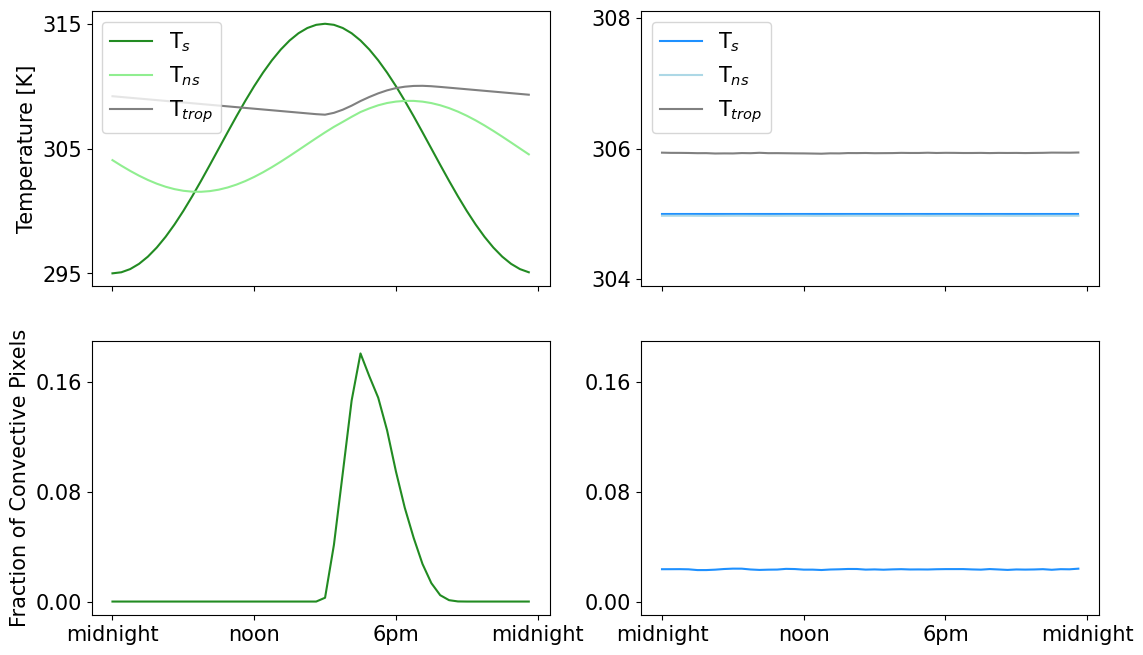

In [155]:
fig, axs = plt.subplots(2,2, figsize=(13,8), dpi=100, sharex=True)

Tns_timeseries=295+20*np.mean(Tns[7*48:], axis=(1,2))

axs[0, 0].plot(295+20*Ts(np.arange(0,48),48,True), label='T$_s$', color='forestgreen')
axs[0, 0].plot(np.mean(Tns_timeseries.reshape(-1, 48), axis=0), label='T$_{ns}$', color='lightgreen')
axs[0, 0].plot(np.mean(295+20*trop_temp_saved[7*48:14*48].reshape(-1,48), axis=0), label='T$_{trop}$',color='grey')
axs[0, 0].set_ylabel('Temperature [K]')


axs[0, 0].set_yticks(np.linspace(295, 315, 3))
axs[0, 0].legend(loc=2)


rain_timeseries=np.mean(x, axis=(1,2))
axs[1, 0].plot(np.mean(rain_timeseries[7*48:].reshape(-1, 48), axis=0), color='forestgreen')

axs[1, 0].set_ylabel('Fraction of Convective Pixels')
axs[1, 0].set_xticks(np.linspace(0,48,4))
axs[1, 0].set_xticklabels(['midnight', 'noon', '6pm', 'midnight'])
axs[1, 0].set_ylim(-0.01,0.19)

axs[1, 0].set_yticks(np.linspace(0, 0.16, 3))

Tns_timeseries_ocean=295+20*np.mean(Tns_ocean[7*48:], axis=(1,2))
axs[0, 1].plot(295+20*Ts(np.arange(0,48),48,False)*np.ones(48), label='T$_s$', color='dodgerblue')
axs[0, 1].plot(np.mean(Tns_timeseries_ocean.reshape(-1, 48), axis=0), label='T$_{ns}$', color='lightblue')
axs[0, 1].plot(np.mean(295+20*trop_temp_saved_ocean[7*48:14*48].reshape(-1,48), axis=0), label='T$_{trop}$',color='grey')
#axs[0, 1].set_ylabel('Temperature [K]')
axs[0, 1].set_ylim(303.9,308.1)
axs[0, 1].set_yticks(np.linspace(304, 308, 3))
#axs[0, 1].set_yticks(np.linspace(295, 315, 3))
axs[0, 1].legend(loc=2)


rain_timeseries=np.mean(x_ocean, axis=(1,2))
axs[1, 1].plot(np.mean(rain_timeseries[7*48:].reshape(-1, 48), axis=0), color='dodgerblue')

#axs[1, 1].set_ylabel('Fraction of Convective Pixels')
axs[1, 1].set_xticks(np.linspace(0,48,4))
axs[1, 1].set_xticklabels(['midnight', 'noon', '6pm', 'midnight'])
axs[1, 1].set_ylim(-0.01,0.19)
axs[1, 1].set_yticks(np.linspace(0, 0.16, 3))